In [1]:
import pandas as pd
from utils import dataframe_to_tensor, tensor_to_dataframe, clean_dataframe, plot_losses, combine_dataframes
import torch
import numpy as np
from IPython.display import display
import torch.nn as nn

In [2]:
num_positive_samples = 10 ** 5
num_unlabeled_samples = 10 ** 5
percent_unlabeled_positive = 0.99

positive_dataframe_train = pd.read_csv('poc_dataset/WalletSmartContract_poc_data_positive_train.csv')
positive_dataframe_train = positive_dataframe_train.sample(n=num_positive_samples)
clean_positive_dataframe_train = clean_dataframe(positive_dataframe_train)
unlabeled_dataframe_train_positive = pd.read_csv('poc_dataset/WalletSmartContract_poc_data_unlabeled_positive_train.csv')
unlabeled_dataframe_train_negative = pd.read_csv('poc_dataset/WalletSmartContract_poc_data_unlabeled_negative_train.csv')
unlabeled_dataframe_train = combine_dataframes(unlabeled_dataframe_train_positive, unlabeled_dataframe_train_negative, num_unlabeled_samples, percent_unlabeled_positive)
clean_unlabeled_dataframe_train = clean_dataframe(unlabeled_dataframe_train)
positive_tensor_train = dataframe_to_tensor(clean_positive_dataframe_train)
unlabeled_tensor_train = dataframe_to_tensor(clean_unlabeled_dataframe_train)

# positive_tensor_train = positive_tensor_train + (torch.rand_like(positive_tensor_train) - 1) / 10
# unlabeled_tensor_train = unlabeled_tensor_train + (torch.rand_like(positive_tensor_train) - 1) / 10

unlabeled_dataframe_test_positive = pd.read_csv('poc_dataset/WalletSmartContract_poc_data_unlabeled_positive_test.csv')
unlabeled_dataframe_test_negative = pd.read_csv('poc_dataset/WalletSmartContract_poc_data_unlabeled_negative_test.csv')
unlabeled_dataframe_test = pd.concat([unlabeled_dataframe_test_positive, unlabeled_dataframe_test_negative], ignore_index=True)
unlabeled_dataframe_test = combine_dataframes(unlabeled_dataframe_test_positive, unlabeled_dataframe_test_negative, None, percent_unlabeled_positive)
clean_unlabeled_dataframe_test = clean_dataframe(unlabeled_dataframe_test)
unlabeled_tensor_test = dataframe_to_tensor(clean_unlabeled_dataframe_test)
pass

In [3]:
print(unlabeled_tensor_train.shape)
print(positive_tensor_train.shape)
print('Positive Training', unlabeled_dataframe_train[unlabeled_dataframe_train['positive']].shape)
print('Negative Training', unlabeled_dataframe_train[~unlabeled_dataframe_train['positive']].shape)
print('Positive Testing', unlabeled_dataframe_test[unlabeled_dataframe_test['positive']].shape)
print('Negative Testing', unlabeled_dataframe_test[~unlabeled_dataframe_test['positive']].shape)

display(unlabeled_dataframe_test[~unlabeled_dataframe_test['positive']][:40])
display(unlabeled_dataframe_train[:20])
display(positive_tensor_train[:20])
pass

torch.Size([100000, 5])
torch.Size([100000, 5])
Positive Training (99000, 7)
Negative Training (1000, 7)
Positive Testing (1875706, 7)
Negative Testing (18946, 7)


,contract,function_id,positive,function_parameters.amount,starting_state.balance,final_state.balance,transaction_return.success
1875706,WalletSmartContract,1.0,False,0.607212,0.000000,1.0,1
1875707,WalletSmartContract,0.0,False,0.374641,0.840877,0.0,1
1875708,WalletSmartContract,0.0,False,0.628791,1.000000,0.0,1
1875709,WalletSmartContract,0.0,False,0.482383,0.825820,0.0,1
1875710,WalletSmartContract,1.0,False,0.885229,0.067800,1.0,1
1875711,WalletSmartContract,1.0,False,0.366257,0.000000,1.0,1
1875712,WalletSmartContract,0.0,False,0.200749,1.000000,0.0,1
1875713,WalletSmartContract,0.0,False,0.783062,1.000000,0.0,1
1875714,WalletSmartContract,0.0,False,0.125916,1.000000,0.0,1
1875715,WalletSmartContract,1.0,False,0.715108,0.686242,1.0,1


,contract,function_id,positive,function_parameters.amount,starting_state.balance,final_state.balance,transaction_return.success
0,WalletSmartContract,0.0,True,-0.873273,0.000000,0.000000,0
1,WalletSmartContract,0.0,True,-0.099210,1.000000,1.000000,0
2,WalletSmartContract,1.0,True,-0.908680,0.023535,0.023535,0
3,WalletSmartContract,0.0,True,-0.654363,0.752161,0.752161,0
4,WalletSmartContract,1.0,True,0.764417,0.867499,0.103082,1
5,WalletSmartContract,0.0,True,0.022996,0.000000,0.022996,1
6,WalletSmartContract,0.0,True,-0.425866,1.000000,1.000000,0
7,WalletSmartContract,0.0,True,-0.019443,0.976303,0.976303,0
8,WalletSmartContract,0.0,True,0.775980,0.000000,0.775980,1
9,WalletSmartContract,0.0,True,-0.279710,1.000000,1.000000,0


tensor([[ 1.0000, -0.4119,  0.4160,  0.4160,  0.0000],
        [ 0.0000, -0.1018,  0.5125,  0.5125,  0.0000],
        [ 1.0000,  0.3018,  0.5903,  0.2885,  1.0000],
        [ 1.0000, -0.5012,  0.1308,  0.1308,  0.0000],
        [ 0.0000, -0.4685,  0.7282,  0.7282,  0.0000],
        [ 0.0000, -0.5412,  0.6814,  0.6814,  0.0000],
        [ 1.0000, -0.4307,  0.6004,  0.6004,  0.0000],
        [ 1.0000, -0.7948,  0.2330,  0.2330,  0.0000],
        [ 0.0000, -0.2342,  0.2146,  0.2146,  0.0000],
        [ 0.0000, -0.3677,  0.9617,  0.9617,  0.0000],
        [ 1.0000, -0.8025,  0.2287,  0.2287,  0.0000],
        [ 1.0000,  0.0621,  0.3670,  0.3048,  1.0000],
        [ 0.0000,  0.0365,  0.6244,  0.6609,  1.0000],
        [ 0.0000,  0.0826,  0.4091,  0.4917,  1.0000],
        [ 0.0000, -0.8938,  0.2591,  0.2591,  0.0000],
        [ 1.0000, -0.9240,  0.0566,  0.0566,  0.0000],
        [ 0.0000, -0.5449,  0.2852,  0.2852,  0.0000],
        [ 1.0000, -0.7850,  0.5900,  0.5900,  0.0000],
        [ 

In [4]:
from observer_gan import random_normal, train, train_wgan, random_model, save_models, load_models
n_epochs = 10000
n_samples_per_epoch = 5000
hidden_size = 25
hidden_layers = 4
discriminator, generator, observer, discriminator_losses, generator_losses, observer_losses = train(1e-3, n_epochs, unlabeled_tensor_train, positive_tensor_train, n_samples_per_epoch, hidden_size, hidden_size, hidden_size, hidden_layers, hidden_layers, hidden_layers)
save_models(discriminator, generator, observer, 'test')
discriminator, generator, observer, _, _, _ = train(1e-3, 0, unlabeled_tensor_train, positive_tensor_train, n_samples_per_epoch, hidden_size, hidden_size, hidden_size, hidden_layers, hidden_layers, hidden_layers)
load_models(discriminator, generator, observer, 'test')

Epoch:  42%|████▎     | 4250/10000 [00:51<01:17, 74.27it/s]

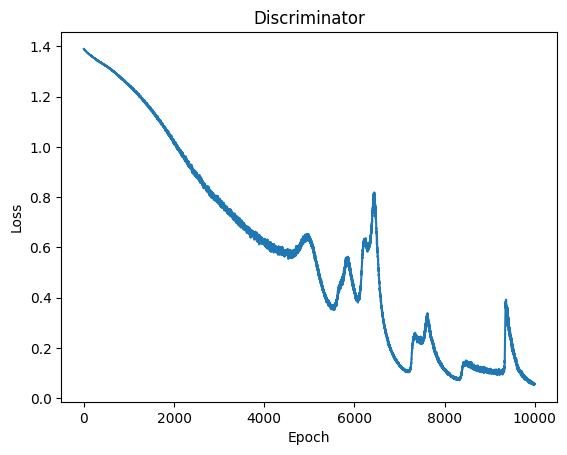

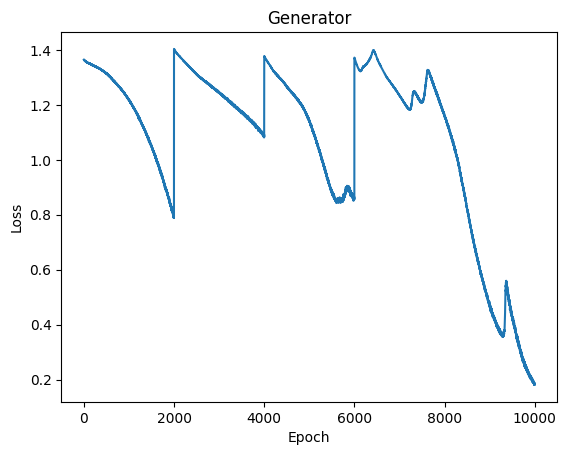

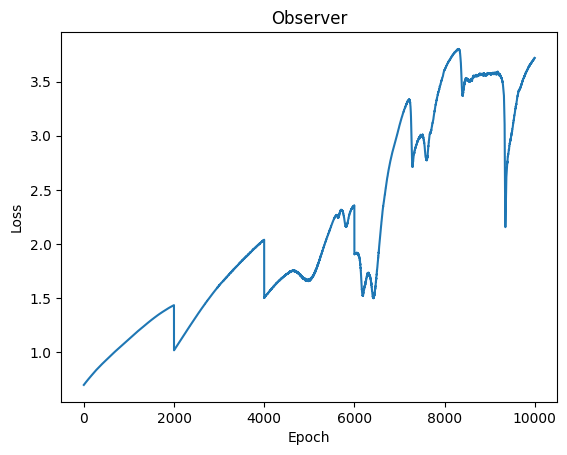

In [ ]:
plot_losses('Discriminator', discriminator_losses)
plot_losses('Generator', generator_losses)
plot_losses('Observer', observer_losses)
pass

In [ ]:
# generated
display(tensor_to_dataframe(generator(random_normal(5, positive_tensor_train.shape[1])).detach(), clean_positive_dataframe_train))

,function_id,function_parameters.amount,starting_state.balance,final_state.balance,transaction_return.success
0,0.992350,2.601609e-05,0.998127,0.008033,0.001691
1,0.948651,1.172904e-03,0.972376,0.055625,0.017412
2,0.999856,3.318977e-09,0.999991,0.000162,0.000012
3,0.998470,5.367803e-07,0.999811,0.001592,0.000236
4,0.995221,6.981671e-06,0.998867,0.005460,0.000978


In [ ]:
# generated
display(tensor_to_dataframe(generator(random_normal(5, positive_tensor_train.shape[1])).detach(), clean_positive_dataframe_train))

,function_id,function_parameters.amount,starting_state.balance,final_state.balance,transaction_return.success
0,0.997986,0.000001,0.999751,0.001844,0.000259
1,0.975131,0.000219,0.990458,0.028199,0.007090
2,0.993829,0.000010,0.998518,0.006887,0.001317
3,0.992976,0.000020,0.997870,0.007972,0.001255
4,0.988662,0.000059,0.996619,0.012695,0.002757


In [ ]:
from eval import evaluate

In [ ]:
sigmoid = nn.Sigmoid()
predicted = sigmoid(observer(unlabeled_tensor_test)).detach().numpy().reshape(-1)
print(sigmoid(observer(unlabeled_tensor_test)))
labels = unlabeled_dataframe_test['positive'].astype(int)

print('Positive (Valid) Predictions')
top_indices = np.argsort(predicted)[-5:][::-1]
display(unlabeled_dataframe_test.iloc[top_indices])

print('Negative (Bugged) Predictions')
top_indices = np.argsort(1 - predicted)[-5:][::-1]
display(unlabeled_dataframe_test.iloc[top_indices])

tensor([[0.7159],
        [0.7259],
        [0.7251],
        ...,
        [0.6796],
        [0.7201],
        [0.7251]], grad_fn=<SigmoidBackward0>)
Positive (Valid) Predictions


,contract,function_id,positive,function_parameters.amount,starting_state.balance,final_state.balance,transaction_return.success
288488,WalletSmartContract,0.0,True,-0.999903,0.915243,0.915243,0
107759,WalletSmartContract,0.0,True,-0.999676,0.919641,0.919641,0
733793,WalletSmartContract,0.0,True,-0.999650,0.914197,0.914197,0
1656784,WalletSmartContract,0.0,True,-0.999914,0.904767,0.904767,0
517304,WalletSmartContract,0.0,True,-0.999977,0.894610,0.894610,0


Negative (Bugged) Predictions


,contract,function_id,positive,function_parameters.amount,starting_state.balance,final_state.balance,transaction_return.success
1661599,WalletSmartContract,1.0,True,-0.000003,1.0,1.0,0
587706,WalletSmartContract,1.0,True,-0.000012,1.0,1.0,0
1423406,WalletSmartContract,1.0,True,-0.000035,1.0,1.0,0
80518,WalletSmartContract,1.0,True,-0.000036,1.0,1.0,0
1334893,WalletSmartContract,1.0,True,-0.000039,1.0,1.0,0


0.5484457382248652
0.009950735835941051


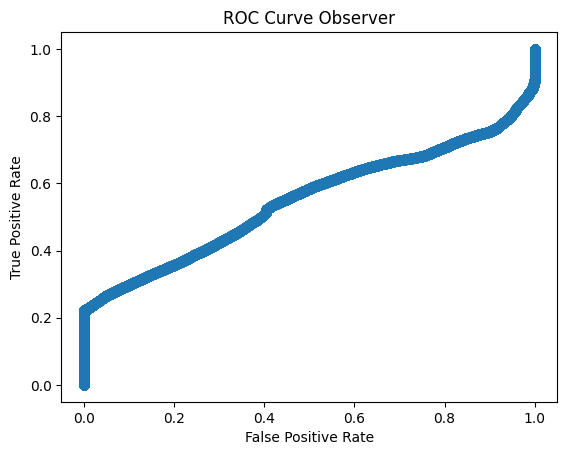

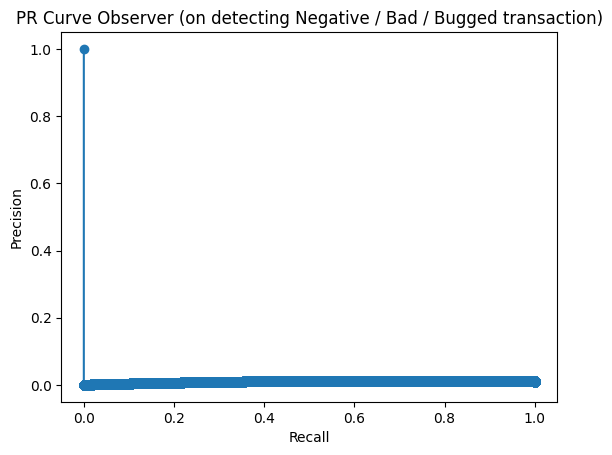

In [ ]:
observer_metrics = evaluate(predicted, labels, plot=True)
print(observer_metrics['auc_roc'])
print(observer_metrics['ap'])

0.49611226088530297
0.009890659766087002


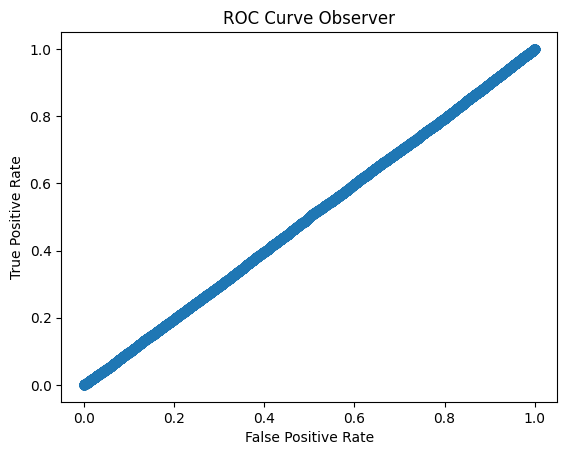

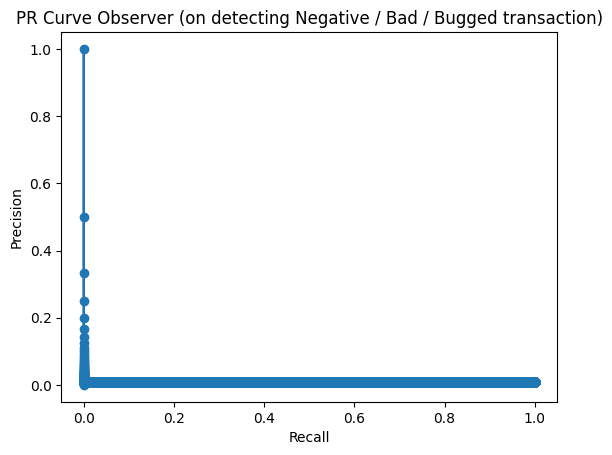

In [ ]:
random_predicted = random_model(unlabeled_tensor_test)
random_metrics = evaluate(random_predicted, labels, plot=True)
print(random_metrics['auc_roc'])
print(random_metrics['ap'])